# Generate Dataset and DataLoader

In [1]:
import numpy as np 
a=np.arange(12288).reshape((3,16,16,16)); 

labels = list(range(1000)); 

result=[]; 
for i in labels:
  result.append(a); 
result = np.array(result); 

print(result.shape)

(1000, 3, 16, 16, 16)


In [2]:
import h5py

def writeDataset(filename, x, y):
  with h5py.File(filename, "w") as h5file:
    shape = [i for i in result.shape[1:]]
    train_set = h5file.create_dataset("X", data=x, dtype=np.float32); 
    label_set = h5file.create_dataset("Y", data=y, dtype="int"); 
    shape = h5file.create_dataset("shape", data=shape)
    print(f"Dumped the data to the {filename} ; Shape: {x.shape} ;")

writeDataset("/tmp/test.h5", result, labels)
# h5file.close()

Dumped the data to the /tmp/test.h5 ; Shape: (1000, 3, 16, 16, 16) ;


In [5]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np 
import h5py

# print(dir(torch))
class MDDataset(Dataset):
  def __init__(self, filename):
    with h5py.File(filename, "r") as file1: 
      self.n_samples = file1["X"].shape[0]
      shape = list(file1["shape"])
      X = np.array(file1["X"]).reshape((self.n_samples, *shape)); 
      self.x = torch.tensor(X, dtype=torch.float32); 
      self.y = torch.tensor(file1["Y"], dtype=torch.float32); 
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]
    
  def __len__(self):
    return self.n_samples
  
a = "/tmp/test.h5"; 
dataset = MDDataset(a); 
loader = DataLoader(dataset=dataset, batch_size=50, shuffle=True, num_workers=2); 
for i in loader:
  print("==>", i[0].shape); 


    

==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])
==> torch.Size([50, 3, 16, 16, 16])


In [ ]:
# Radius of Gyration 
# Normalize the pocket size 

rog lig 

/rog * 



ROG1:  [2.81255239]
ROG2:  [7.33124091]
Calculating pairwise distance
6.193627 [2.81255239] [2.20213743] [0.84482654]
[1.67493835]


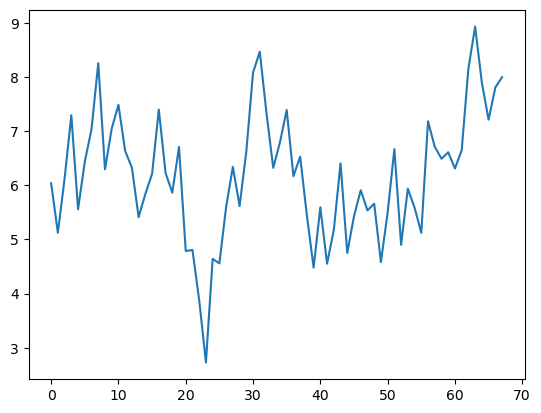

In [35]:
import pytraj as pt 
from BetaPose import utils
import matplotlib.pyplot as plt 
a = "/home/yzhang/Downloads/C001bfl1sim1_PDB.pdb"; 
a = "/home/yzhang/Downloads/C479thistest_PDB.pdb"
traj = pt.load(a)
traj.top.set_reference(traj[0])

rog1 = pt.radgyr(traj, ":LIG")
rog2 = pt.radgyr(traj, ":LIG<:5")
print("ROG1: ", rog1)
print("ROG2: ", rog2)
dist, info = utils.PairwiseDistance(traj, ":LIG<:5 &!:LIG & @C,CA,N,O", ":LIG")
plt.plot(dist)


print(dist.mean(), rog1, dist.mean()/rog1, dist.mean()/rog2, )

# print((rog2-rog1)/rog1)
# print((rog2-rog1)/dist.mean())
print(dist.mean() + rog1 -rog2)


In [49]:
import requests
import json
def getframe(trajid, frameid=-1):
  data = {
      'cmd': 'sendtraj',
#       'JOBID': 'simtemp3',
      'querymode': '1',
#       'traj_id': 'C001simtemp3',
#       'frameIndex': '12',
  }  
  
  if len(trajid) == 12:
    data["JOBID"] = trajid[-8:];
    data["traj_id"] = trajid
  else: 
    print("Trajectory id should be a 12-char string")
    return
  if isinstance(frameid, int): 
    data['frameIndex'] = frameid; 
  else: 
    print("Frame index should be an integer")
    return

  response = requests.post('http://130.60.168.149/fcgi-bin/ACyang.fcgi', data=data)
  ret = json.loads(response.text)
  print(ret.keys())
getframe("C001simtemp3")

dict_keys(['Coordinate', 'MOL2File', 'PDBFile', 'status'])
